# Objetivos

- Entender as relações entre as variáveis explicativas e entre as variáveis explicativas e a resposta.

- Avaliação de criação de variáveis.

# Pacotes e funções

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [35]:
%run /home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/99.Funcoes_auxiliares/Funcoes.py

# Leitura da base de treino

In [3]:
dados_full = pd.read_parquet('../1.Base_de_dados/treino.parquet')
dados_full.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
index,,,,,,,,
353955,5.689623,0.347200,1.105109,1,0,0,1,0
4582,58.380209,0.124193,0.334676,1,0,0,1,0
995260,21.729568,2.809812,0.352684,1,0,0,0,0
713182,49.862629,1.040213,0.943036,1,0,0,1,0
309053,13.585701,3.446598,1.715601,1,0,0,0,0


In [4]:
# Volumetria dos dados
dados_full.shape

(783000, 8)

In [5]:
dados = dados_full.sample(frac=0.1, random_state=123)
dados.shape

(78300, 8)

In [6]:
# Avalia duplicidade dos dados
dados.duplicated().sum().sum()

0

In [7]:
# Avalia tipagem dos dados e informação de nulidade de variáveis
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78300 entries, 770916 to 69389
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              78300 non-null  float64
 1   distance_from_last_transaction  78300 non-null  float64
 2   ratio_to_median_purchase_price  78300 non-null  float64
 3   repeat_retailer                 78300 non-null  int64  
 4   used_chip                       78300 non-null  int64  
 5   used_pin_number                 78300 non-null  int64  
 6   online_order                    78300 non-null  int64  
 7   fraud                           78300 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 5.4 MB


## Estudo das variáveis categóricas

### Univariada

In [8]:
# Somente 8,7% das transações são fraudulentas
conta_categorias(df = dados, variavel='fraud')[0], conta_categorias(df = dados, variavel='fraud')[1]

(   fraud  count
 0      0  71585
 1      1   6715,
    fraud     count
 0      0  91.42401
 1      1   8.57599)

In [9]:
# 88% das transações ocorreram em lojas que já haviam sido visitadas anteriormente
conta_categorias(df = dados, variavel='repeat_retailer')[0], conta_categorias(df = dados, variavel='repeat_retailer')[1]

(   repeat_retailer  count
 1                0   9339
 0                1  68961,
    repeat_retailer      count
 1                0  11.927203
 0                1  88.072797)

In [10]:
# 35% das transações ocorreram com o uso do chip do cartão de crédito
conta_categorias(df = dados, variavel='used_chip')[0], conta_categorias(df = dados, variavel='used_chip')[1]

(   used_chip  count
 0          0  50802
 1          1  27498,
    used_chip      count
 0          0  64.881226
 1          1  35.118774)

In [11]:
# 10% das transações ocorreram com o uso do número do PIN
conta_categorias(df = dados, variavel='used_pin_number')[0], conta_categorias(df = dados, variavel='used_pin_number')[1]

(   used_pin_number  count
 0                0  70459
 1                1   7841,
    used_pin_number      count
 0                0  89.985951
 1                1  10.014049)

In [12]:
# 65% das transações ocorreram em pedidos online
conta_categorias(df = dados, variavel='online_order')[0], conta_categorias(df = dados, variavel='online_order')[1]

(   online_order  count
 1             0  27454
 0             1  50846,
    online_order     count
 1             0  35.06258
 0             1  64.93742)

### Bivariada: explicativas e target

Busca-se avaliar a distribuição condicional das frequências/probabilidades em relação as variáveis categóricas, compará-las entre os níveis e em relação a distribuição de frequência geral (média da variável target na ausência de outras variáveis).

A probabilidade de ser fraude condicionada a compra ser do mesmo comerciante ou loja (ou de não ser do mesmo comerciante ou loja) é muito próxima da probabilidade ou distribuição de frequência da própria variável target. Ou seja, é provável que a variável repeat_retailer não traga tanto insumo no entendimento de uma transação ser ou não fraudulenta.

In [13]:
pd.crosstab(dados['repeat_retailer'], dados['fraud'], normalize='index', margins=True)

fraud,0,1
repeat_retailer,,
0,0.906307,0.093693
1,0.915314,0.084686
All,0.914240,0.085760


In [14]:
pd.crosstab(dados['repeat_retailer'], dados['fraud'], normalize=False, margins=True)

fraud,0,1,All
repeat_retailer,,,
0,8464,875,9339
1,63121,5840,68961
All,71585,6715,78300


Diferente da variável anterior, consegue-se notar diferenças na distribuição condicionada das probabilidades da transação ser fraudulenta ou não. Agora, o uso do número PIN se mostra bem vantajoso (desconsiderando outras variáveis) quando se compara sem o uso do PIN e desconsiderando qualquer variável, ou seja, somente a distribuição de frequência da variável target.

É importante salientar que para esta variável, não só a distribuição percentual é baixa, como também a representatividade absoluta é bem baixa para as transações que são fraudulentas e que também usaram o número PIN. Veja a segunda tabela abaixo.

In [15]:
pd.crosstab(dados['used_pin_number'], dados['fraud'], normalize='index', margins=True)

fraud,0,1
used_pin_number,,
0,0.905023,0.094977
1,0.997067,0.002933
All,0.914240,0.085760


In [16]:
pd.crosstab(dados['used_pin_number'], dados['fraud'], normalize=False, margins=True)

fraud,0,1,All
used_pin_number,,,
0,63767,6692,70459
1,7818,23,7841
All,71585,6715,78300


A probabilidade da transação ser fraudulenta, condicionada que foi feita usando o chip, é menor comparada sem o uso do chip ($~3\%$ menor) e sem considerar a variável chip ($~2\%$ menor). Neste caso, veja que a quantidade absoluta de casos fraudulentos é considerável com e sem o uso do chip.

In [17]:
pd.crosstab(dados['used_chip'], dados['fraud'], normalize='index', margins=True)

fraud,0,1
used_chip,,
0,0.902228,0.097772
1,0.936432,0.063568
All,0.914240,0.085760


In [18]:
pd.crosstab(dados['used_chip'], dados['fraud'], normalize=False, margins=True)

fraud,0,1,All
used_chip,,,
0,45835,4967,50802
1,25750,1748,27498
All,71585,6715,78300


Na era digital em que vivemos, era de se esperar que a probabilidade de ser uma transação fraudulenta condicionada se o pedido foi online ou não fosse bem diferente. Note que, a probabilidade da transação ser fraudulenta é 12x maior quando o pedido foi feito online, comparado quando não foi feito online. Além disso, percebe-se diferença em relação a distribuição geral de fraudes, ou seja, a frequência de ser uma transação fraudulenta condicionada ao pedido online está 4 p.p. acima da média de fraudes.

In [19]:
pd.crosstab(dados['online_order'], dados['fraud'], normalize='index', margins=True)

fraud,0,1
online_order,,
0,0.986523,0.013477
1,0.875211,0.124789
All,0.914240,0.085760


In [20]:
pd.crosstab(dados['online_order'], dados['fraud'], normalize=False, margins=True)

fraud,0,1,All
online_order,,,
0,27084,370,27454
1,44501,6345,50846
All,71585,6715,78300


### Bivariada: entre explicativas categóricas

Busca-se identificar alguma relação entre as variáveis categóricas, identificando alguma concentração em níveis das variáveis explicativas. Aparentemente, nenhuma diferença foi observada.

In [21]:
colunas = ['repeat_retailer', 'used_pin_number', 'used_chip', 'online_order']

for i in range(0,len(colunas)):
    for j in range(i+1,len(colunas)):
        print(colunas[i], '+', colunas[j])
        print(pd.crosstab(dados[colunas[i]], dados[colunas[j]], normalize='index', margins=True))
        print('\n')
        print('====================================')
        print('\n')

repeat_retailer + used_pin_number
used_pin_number         0         1
repeat_retailer                    
0                0.895385  0.104615
1                0.900465  0.099535
All              0.899860  0.100140




repeat_retailer + used_chip
used_chip               0         1
repeat_retailer                    
0                0.637756  0.362244
1                0.650310  0.349690
All              0.648812  0.351188




repeat_retailer + online_order
online_order            0         1
repeat_retailer                    
0                0.349074  0.650926
1                0.350836  0.649164
All              0.350626  0.649374




used_pin_number + used_chip
used_chip               0         1
used_pin_number                    
0                0.648235  0.351765
1                0.653998  0.346002
All              0.648812  0.351188




used_pin_number + online_order
online_order            0         1
used_pin_number                    
0                0.350857  0.649143
1   

## Estudo das variáveis numéricas

- 50% das transações estão entre 3.8 a 25.7 unidades de medida, distantes de casa;
- 50% das transações estão entre 0.29 a 3.35 unidades de medida, da última transação e 
- 50% das transações estão entre 0.48 a 2.1 vezes a mediana de compra dos clientes.

In [22]:
dados[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']].describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
count,78300.000000,78300.000000,78300.000000
mean,26.382401,4.918334,1.809581
std,59.821992,21.657937,2.678136
min,0.022599,0.000539,0.008952
25%,3.924027,0.290995,0.479122
50%,10.086565,0.994281,1.002532
75%,25.751608,3.347184,2.083934
max,2522.399266,2119.899612,79.897521


### Univariada

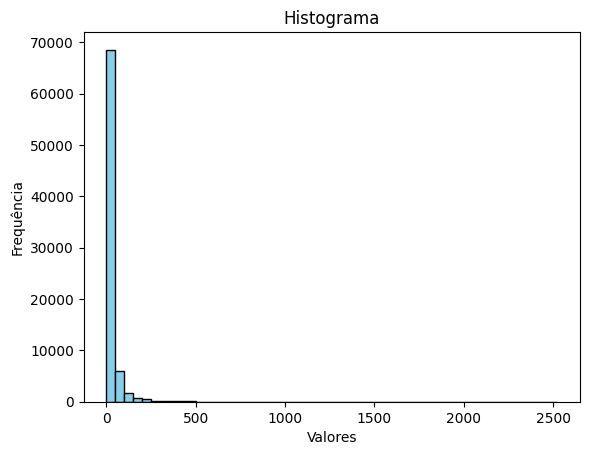

In [23]:
# Muita concentração em distâncias até 1000 unidades de medida
plot_histograma(df=dados, variavel='distance_from_home', bins=50)      

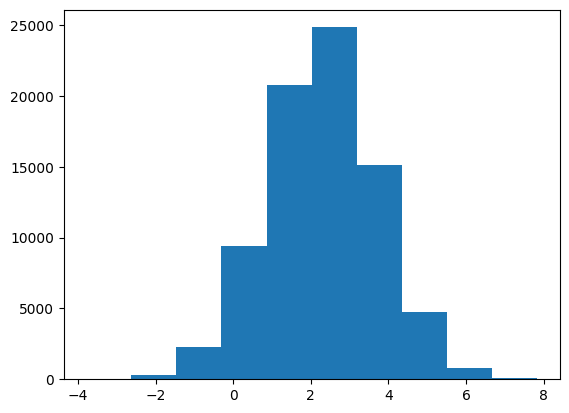

In [24]:
plt.hist(np.log(dados['distance_from_home']))
plt.show()

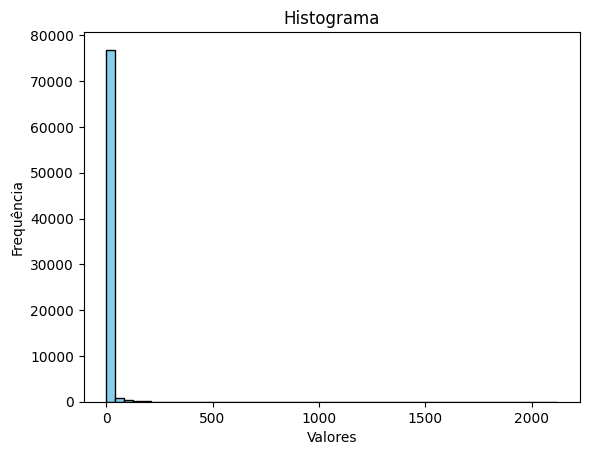

In [25]:
# Muita concentração em distâncias até 1000 unidades de medida
plot_histograma(df=dados, variavel='distance_from_last_transaction', bins=50)

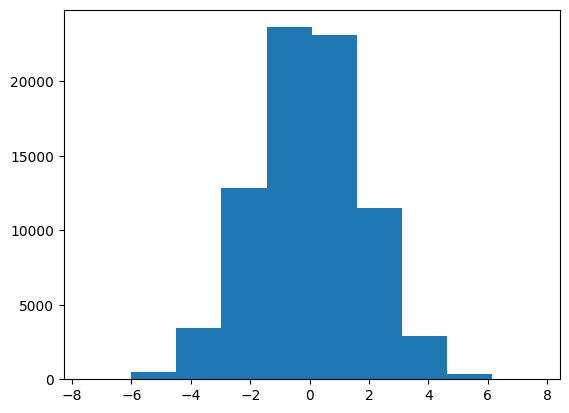

In [26]:
plt.hist(np.log(dados['distance_from_last_transaction']))
plt.show()

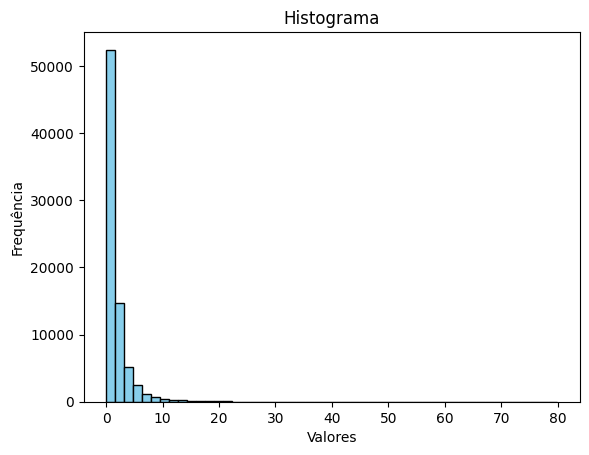

In [27]:
# Muita concentração em valores até 25 vezes a mediana de compras
plot_histograma(df=dados, variavel='ratio_to_median_purchase_price', bins=50)

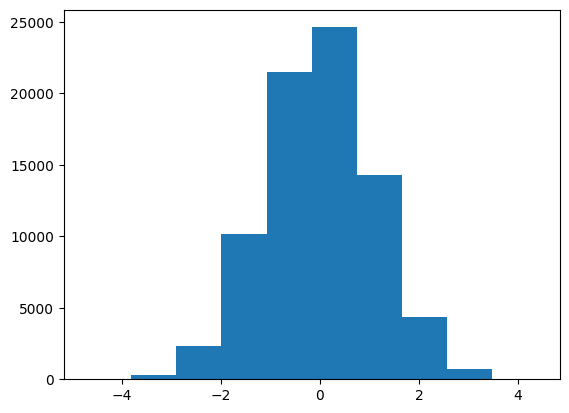

In [28]:
plt.hist(np.log(dados['ratio_to_median_purchase_price']))
plt.show()

### Construção das variáveis numéricas na escala logarítmica

In [29]:
dados['log_distance_from_home'] = np.log(dados['distance_from_home'])
dados['log_distance_from_last_transaction'] = np.log(dados['distance_from_last_transaction'])
dados['log_ratio_to_median_purchase_price'] = np.log(dados['ratio_to_median_purchase_price'])

### Histograma das variáveis numéricas e a variável target

De maneira geral, nota-se que as transações fraudulentas tem um pico na cauda superior direita da distribuição, com destaque para a variável log_ratio_to_median_purchase_price.

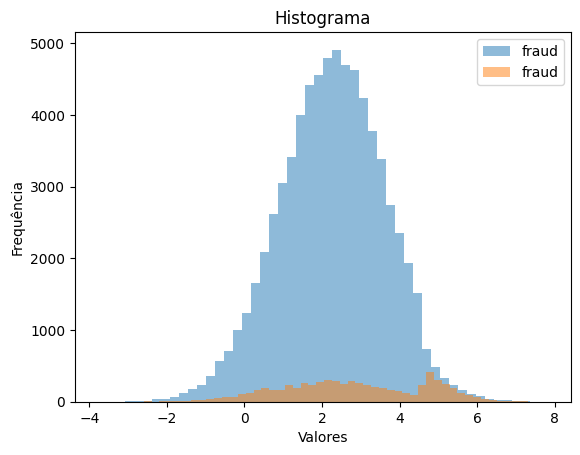

In [36]:
plot_histograma(df=dados, variavel='log_distance_from_home', label='fraud',bins=50)

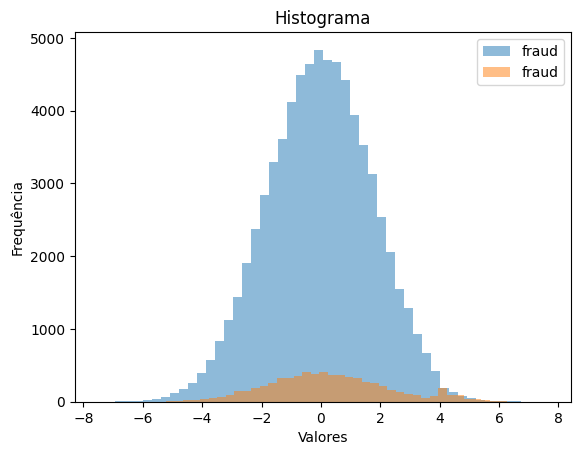

In [37]:
plot_histograma(df=dados, variavel='log_distance_from_last_transaction', label='fraud',bins=50)

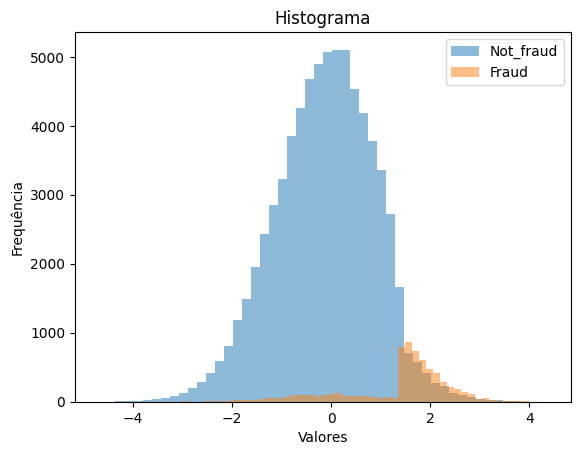

In [32]:
plot_histograma(df=dados, variavel='log_ratio_to_median_purchase_price', label='fraud',bins=50)

### Boxplot das variáveis numéricas com as categóricas

In [33]:
dados.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,log_distance_from_home,log_distance_from_last_transaction,log_ratio_to_median_purchase_price
index,,,,,,,,,,,
770916,3.132982,0.136709,0.905399,1,0,0,1,0,1.141985,-1.989898,-0.099380
122996,20.395077,0.805684,2.582759,1,0,1,1,0,3.015294,-0.216063,0.948858
59892,55.317530,2.933958,0.573614,1,0,0,1,0,4.013090,1.076352,-0.555799
592594,378.405321,1.208453,2.182680,1,0,0,1,1,5.935966,0.189341,0.780553
606400,9.967356,1.027505,0.781084,1,0,0,1,0,2.299315,0.027133,-0.247073


repeat_retailer + log_distance_from_home


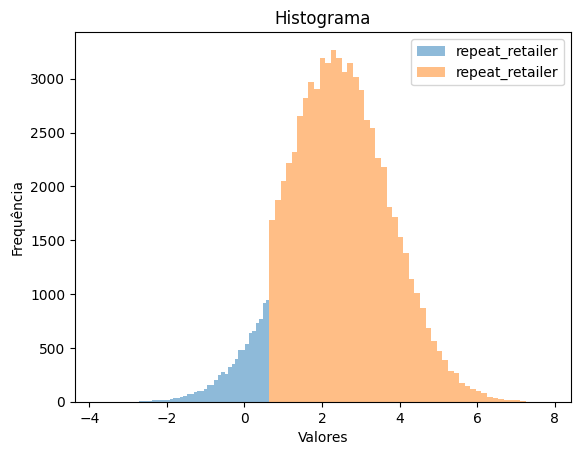





repeat_retailer + log_distance_from_last_transaction


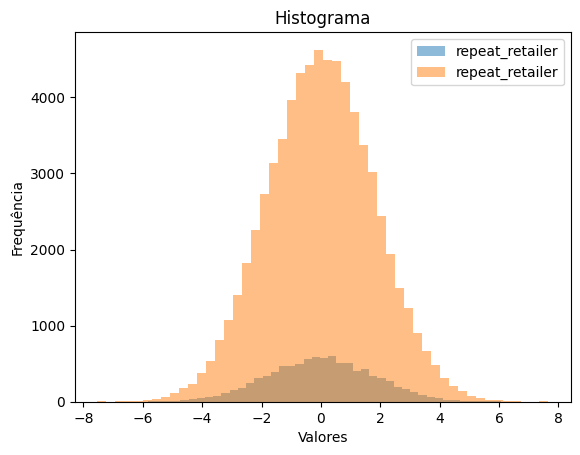





repeat_retailer + log_ratio_to_median_purchase_price


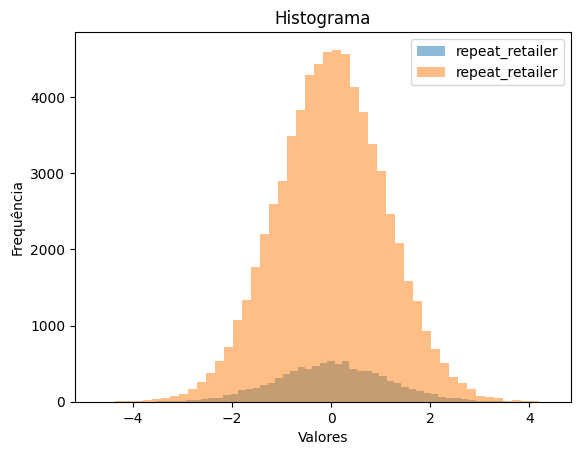





used_pin_number + log_distance_from_home


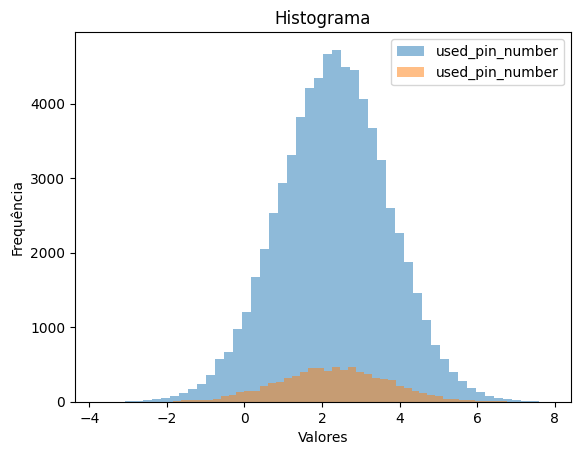





used_pin_number + log_distance_from_last_transaction


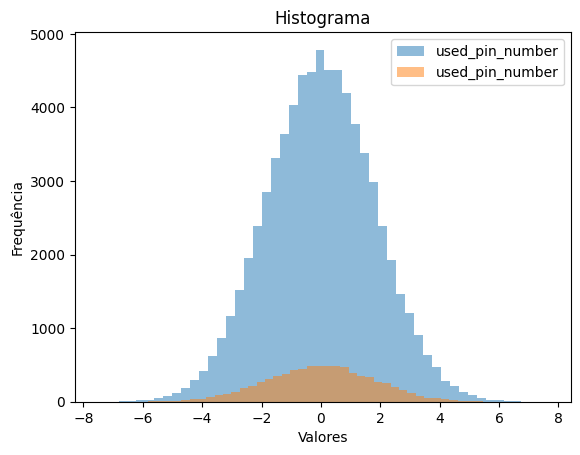





used_pin_number + log_ratio_to_median_purchase_price


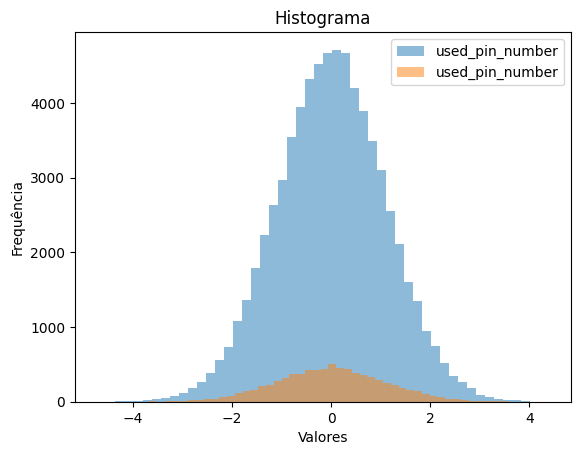





used_chip + log_distance_from_home


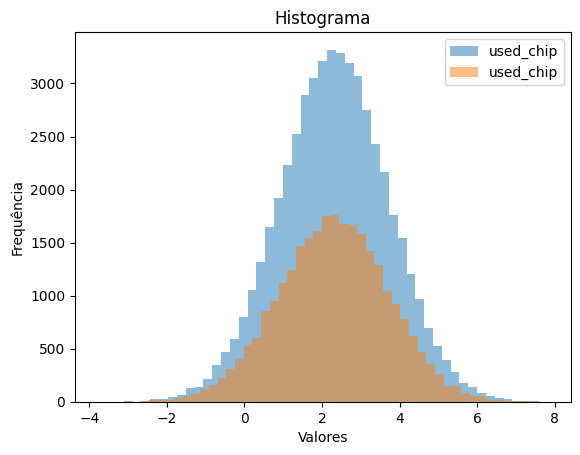





used_chip + log_distance_from_last_transaction


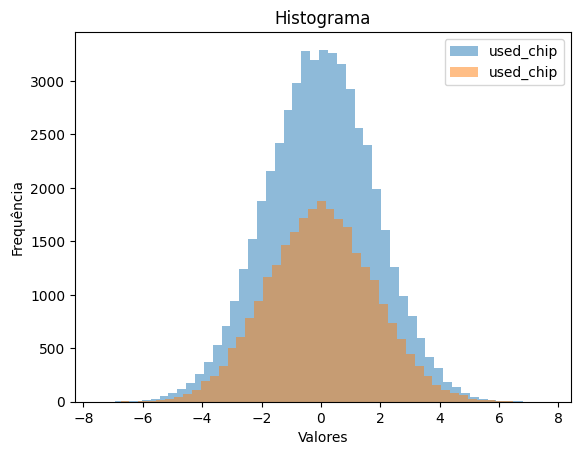





used_chip + log_ratio_to_median_purchase_price


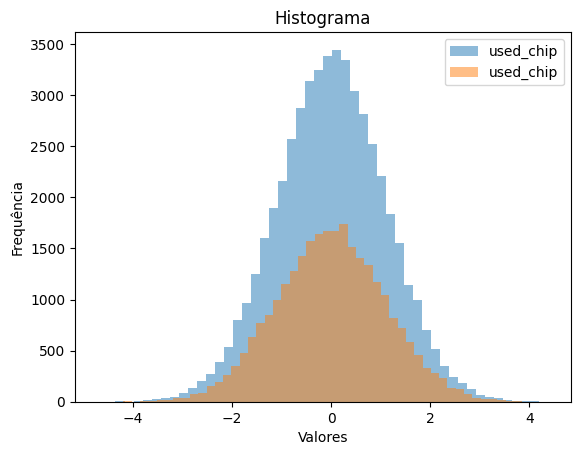





online_order + log_distance_from_home


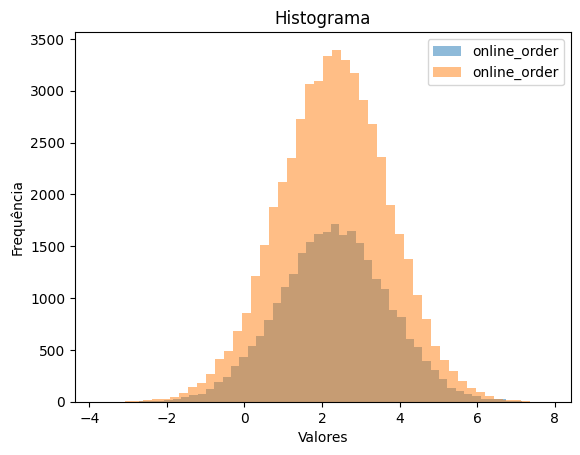





online_order + log_distance_from_last_transaction


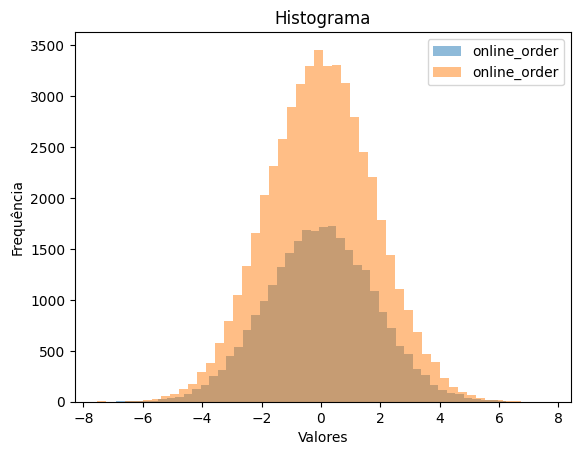





online_order + log_ratio_to_median_purchase_price


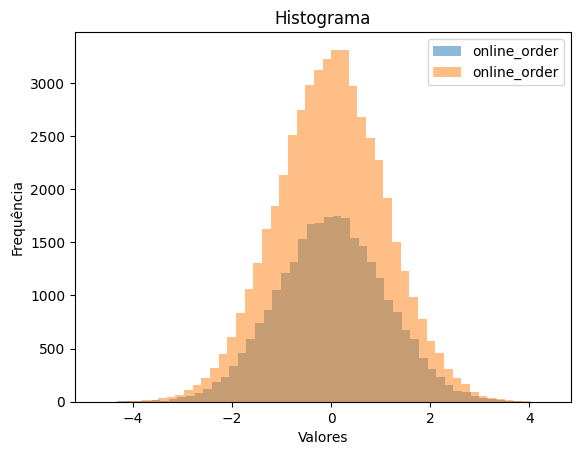

In [39]:
categoricas = ['repeat_retailer', 'used_pin_number', 'used_chip', 'online_order']
numericas = ['log_distance_from_home', 'log_distance_from_last_transaction', 'log_ratio_to_median_purchase_price']

for i in categoricas:
    for j in numericas:
        print(i, '+', j)
        plot_histograma(df=dados, variavel=j, label=i,bins=50)
        print('\n')
        print('====================================')
        print('\n')

### Correlação entre as variáveis numéricas

In [48]:
lista_numericas = ['log_distance_from_home', 'log_distance_from_last_transaction', 'log_ratio_to_median_purchase_price']

In [46]:
# Nenhuma variável numérica correlacionada com outra
Vars_Correl(dataframe=dados, list_vars_num=lista_numericas, limiar=0.6, metodo='spearman')

,Var1,Var2,Valores


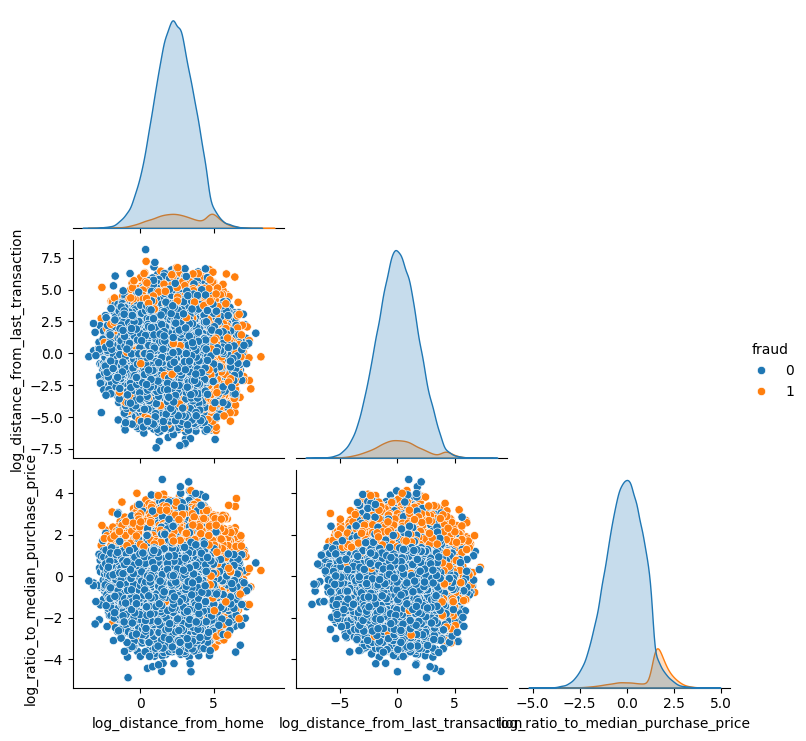

In [49]:
numericas = lista_numericas + ['fraud']
sns.pairplot(dados[numericas].sample(frac=.1, random_state=1234), hue="fraud", corner = True)

<Axes: >

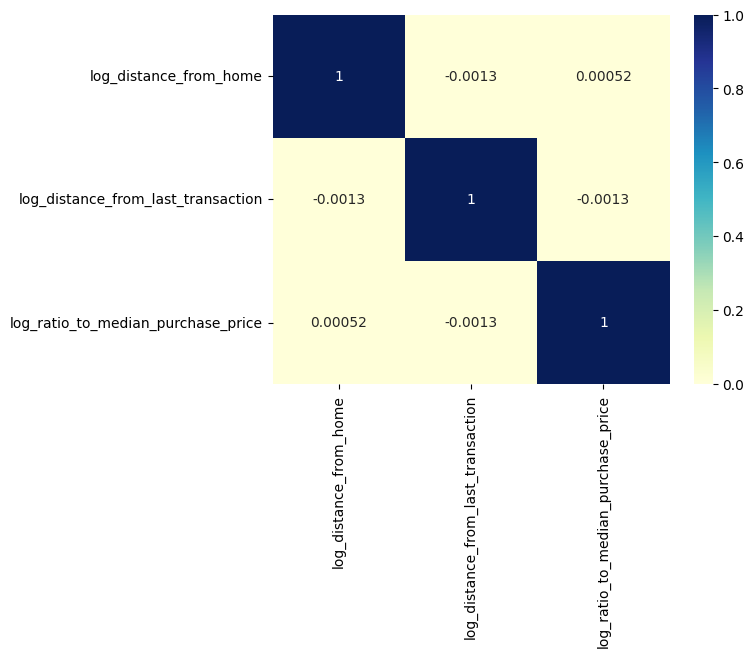

In [40]:
sns.heatmap(dados[lista_numericas].corr(method = 'spearman'), cmap="YlGnBu", annot=True)

### Categorização das variáveis numéricas

In [ ]:
cortes_DFH =  Categorizacao(dados, 5, 'log_distance_from_home')
cortes_DFLT = Categorizacao(dados, 5, 'log_distance_from_last_transaction')
cortes_RMPP = Categorizacao(dados, 5, 'log_ratio_to_median_purchase_price')

In [23]:
dados['DFH'] = pd.cut(dados['log_distance_from_home'], bins=cortes_DFH[1], include_lowest=True)
dados['DFLT'] = pd.cut(dados['log_distance_from_last_transaction'], bins=cortes_DFLT[1], include_lowest=True)
dados['RMPP'] = pd.cut(dados['log_ratio_to_median_purchase_price'], bins=cortes_RMPP[1], include_lowest=True)

### Relacionamento de categóricas com numéricas (Pearson)

A correlação de Pearson é invariante a transformações lineares. Aqui, a correlação foi calculada nas variáveis transformadas pelo logarítmo (transformação não linear). Assim, os valores serão diferentes, caso a correlação seja calculada nas variáveis originais.


A correlação ponto-biserial é um caso especial de correlação de Pearson em que uma variável numérica e categórica estão em análise. Veja abaixo, o cálculo do ponto-biserial e do mapa de calor usando a correlação de Pearson. (https://datatab.net/tutorial/point-biserial-correlation)

In [51]:
from scipy.stats import pointbiserialr

In [52]:
pointbiserialr(dados['log_distance_from_home'], dados['repeat_retailer'])

SignificanceResult(statistic=np.float64(0.6139069651152929), pvalue=np.float64(0.0))

<Axes: >

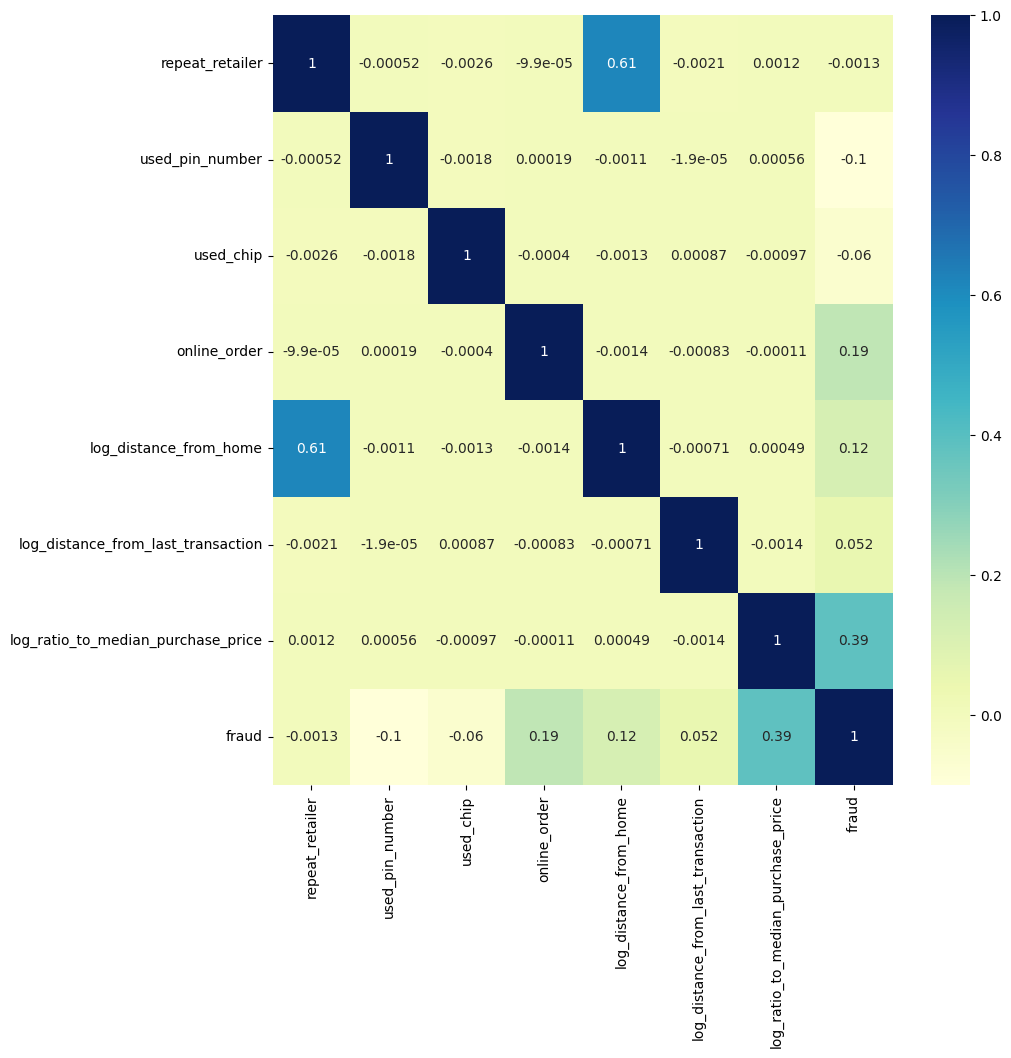

In [50]:
fig, ax = plt.subplots(figsize=(10, 10))
num_cat = ['repeat_retailer', 'used_pin_number', 'used_chip', 'online_order', 'log_distance_from_home', 'log_distance_from_last_transaction', 'log_ratio_to_median_purchase_price', 'fraud']
sns.heatmap(dados[num_cat].corr(method = 'pearson'), cmap="YlGnBu", annot=True)

# Cálculo do IV das variáveis

In [24]:
dados.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud', 'log_distance_from_home',
       'log_distance_from_last_transaction',
       'log_ratio_to_median_purchase_price', 'DFH', 'DFLT', 'RMPP'],
      dtype='object')

In [36]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783000 entries, 353955 to 748258
Data columns (total 14 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   distance_from_home                  783000 non-null  float64 
 1   distance_from_last_transaction      783000 non-null  float64 
 2   ratio_to_median_purchase_price      783000 non-null  float64 
 3   repeat_retailer                     783000 non-null  int64   
 4   used_chip                           783000 non-null  int64   
 5   used_pin_number                     783000 non-null  int64   
 6   online_order                        783000 non-null  int64   
 7   fraud                               783000 non-null  int64   
 8   log_distance_from_home              783000 non-null  float64 
 9   log_distance_from_last_transaction  783000 non-null  float64 
 10  log_ratio_to_median_purchase_price  783000 non-null  float64 
 11  DFH          

In [39]:
vars = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'DFH', 'DFLT', 'RMPP', 'fraud']
dados_iv = dados[vars]

dados_iv['repeat_retailer'] = dados_iv['repeat_retailer'].astype('category')
dados_iv['used_chip'] = dados_iv['used_chip'].astype('category')
dados_iv['used_pin_number'] = dados_iv['used_pin_number'].astype('category')
dados_iv['online_order'] = dados_iv['online_order'].astype('category')

/tmp/ipykernel_14204/1011214775.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_iv['repeat_retailer'] = dados_iv['repeat_retailer'].astype('category')
/tmp/ipykernel_14204/1011214775.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_iv['used_chip'] = dados_iv['used_chip'].astype('category')
/tmp/ipykernel_14204/1011214775.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [41]:
IV_lista_variaveis(dados = dados_iv, var_target = 'fraud')

,Variaveis,IV
6,RMPP,1.881547
3,online_order,0.765662
2,used_pin_number,0.396764
4,DFH,0.177058
1,used_chip,0.049229
5,DFLT,0.018672
0,repeat_retailer,0.000020


## Uso do OptimalBinnig 

In [53]:
from optbinning import OptimalBinning

In [ ]:
variable = 'log_distance_from_home'
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp", min_n_bins=3, max_n_bins=5, monotonic_trend="auto")
optb.fit(dados[variable], dados['fraud'])
optb.binning_table.build()

/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.64)",93015,0.118793,84792,8223,0.088405,-0.012491,0.000019,0.000002
1,"[0.64, 2.21)",278175,0.355268,259733,18442,0.066296,0.299266,0.028134,0.003504
2,"[2.21, 2.42)",47356,0.060480,44349,3007,0.063498,0.34539,0.006261,0.000779
3,"[2.42, 4.60)",325304,0.415458,303873,21431,0.065880,0.306014,0.034307,0.004272
4,"[4.60, inf)",39150,0.050000,21816,17334,0.442759,-2.115784,0.471298,0.049914
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,783000,1.000000,714563,68437,0.087404,,0.540018,0.058471


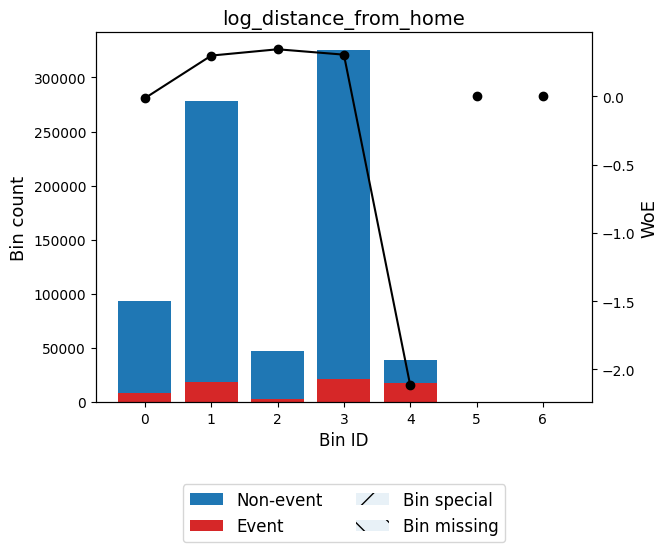

In [59]:
optb.binning_table.plot(metric="woe")

In [84]:
variable = 'log_ratio_to_median_purchase_price'
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp", min_n_bins=3, max_n_bins=5, monotonic_trend="auto")
optb.fit(dados[variable], dados['fraud'])
optb.binning_table.build()

/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.25)",463832,0.592378,452196,11636,0.025087,1.314254,0.608242,0.070991
1,"[0.25, 0.84)",144545,0.184604,141127,3418,0.023647,1.374847,0.202869,0.023533
2,"[0.84, 1.08)",47964,0.061257,46774,1190,0.024810,1.325617,0.063722,0.007429
3,"[1.08, 1.39)",45802,0.058496,44559,1243,0.027139,1.233529,0.054517,0.006413
4,"[1.39, inf)",80857,0.103266,29907,50950,0.630125,-2.87851,2.022518,0.190780
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,783000,1.000000,714563,68437,0.087404,,2.951868,0.299146


In [83]:
variable = 'log_distance_from_last_transaction'
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp", min_n_bins=3, max_n_bins=5, monotonic_trend="auto")
optb.fit(dados[variable], dados['fraud'])
optb.binning_table.build()

/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.39)",458765,0.585907,421058,37707,0.082192,0.067167,0.002571,0.000321
1,"[0.39, 1.36)",148021,0.189043,136039,11982,0.080948,0.083779,0.001282,0.000160
2,"[1.36, 1.72)",44560,0.056909,41076,3484,0.078187,0.121485,0.000799,0.000100
3,"[1.72, 2.95)",92497,0.118132,85032,7465,0.080705,0.087045,0.000863,0.000108
4,"[2.95, inf)",39157,0.050009,31358,7799,0.199173,-0.954284,0.066871,0.008055
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,783000,1.000000,714563,68437,0.087404,,0.072386,0.008745


In [77]:
dados['online_order'] = dados['online_order'].astype('category')
dados['used_pin_number'] = dados['used_pin_number'].astype('category')
dados['repeat_retailer'] = dados['repeat_retailer'].astype('category')
dados['used_chip'] = dados['used_chip'].astype('category')

In [76]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783000 entries, 353955 to 748258
Data columns (total 11 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   distance_from_home                  783000 non-null  float64 
 1   distance_from_last_transaction      783000 non-null  float64 
 2   ratio_to_median_purchase_price      783000 non-null  float64 
 3   repeat_retailer                     783000 non-null  int64   
 4   used_chip                           783000 non-null  int64   
 5   used_pin_number                     783000 non-null  category
 6   online_order                        783000 non-null  category
 7   fraud                               783000 non-null  int64   
 8   log_distance_from_home              783000 non-null  float64 
 9   log_distance_from_last_transaction  783000 non-null  float64 
 10  log_ratio_to_median_purchase_price  783000 non-null  float64 
dtypes: category(2

In [78]:
variable = 'online_order'
optb = OptimalBinning(name=variable, dtype="categorical", solver="cp", min_n_bins=3, max_n_bins=5, monotonic_trend="auto")
optb.fit(dados[variable], dados['fraud'])
optb.binning_table.build()

/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[0, 1]",783000,1.0,714563,68437,0.087404,0.0,0.0,0.0
1,Special,0,0.0,0,0,0.000000,0.0,0.0,0.0
2,Missing,0,0.0,0,0,0.000000,0.0,0.0,0.0
Totals,,783000,1.0,714563,68437,0.087404,,0.0,0.0


In [79]:
variable = 'used_pin_number'
optb = OptimalBinning(name=variable, dtype="categorical", solver="cp", min_n_bins=3, max_n_bins=5, monotonic_trend="auto")
optb.fit(dados[variable], dados['fraud'])
optb.binning_table.build()

/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[1, 0]",783000,1.0,714563,68437,0.087404,0.0,0.0,0.0
1,Special,0,0.0,0,0,0.000000,0.0,0.0,0.0
2,Missing,0,0.0,0,0,0.000000,0.0,0.0,0.0
Totals,,783000,1.0,714563,68437,0.087404,,0.0,0.0


In [80]:
variable = 'repeat_retailer'
optb = OptimalBinning(name=variable, dtype="categorical", solver="cp", min_n_bins=3, max_n_bins=5, monotonic_trend="auto")
optb.fit(dados[variable], dados['fraud'])
optb.binning_table.build()

/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[1, 0]",783000,1.0,714563,68437,0.087404,0.0,0.0,0.0
1,Special,0,0.0,0,0,0.000000,0.0,0.0,0.0
2,Missing,0,0.0,0,0,0.000000,0.0,0.0,0.0
Totals,,783000,1.0,714563,68437,0.087404,,0.0,0.0


In [81]:
variable = 'used_chip'
optb = OptimalBinning(name=variable, dtype="categorical", solver="cp", min_n_bins=3, max_n_bins=5, monotonic_trend="auto")
optb.fit(dados[variable], dados['fraud'])
optb.binning_table.build()

/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[1, 0]",783000,1.0,714563,68437,0.087404,0.0,0.0,0.0
1,Special,0,0.0,0,0,0.000000,0.0,0.0,0.0
2,Missing,0,0.0,0,0,0.000000,0.0,0.0,0.0
Totals,,783000,1.0,714563,68437,0.087404,,0.0,0.0
